In [1]:
import torch
import torchtext
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device availble for runing:")
print(device)

Device availble for runing:
cpu


In [2]:
import pandas as pd
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import tensorflow as tf
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk("/content/drive/MyDrive/TESS_Dataset"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral
1,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral
2,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral
3,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral
4,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral


In [5]:
df['label'].value_counts()

neutral    400
angry      400
ps         400
sad        400
happy      400
disgust    400
fear       400
Name: label, dtype: int64

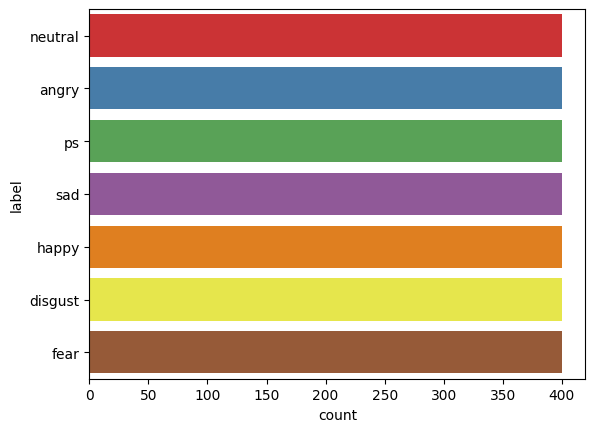

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'label' column
sns.countplot(data=df, y='label', palette='Set1')
plt.show()

In [7]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

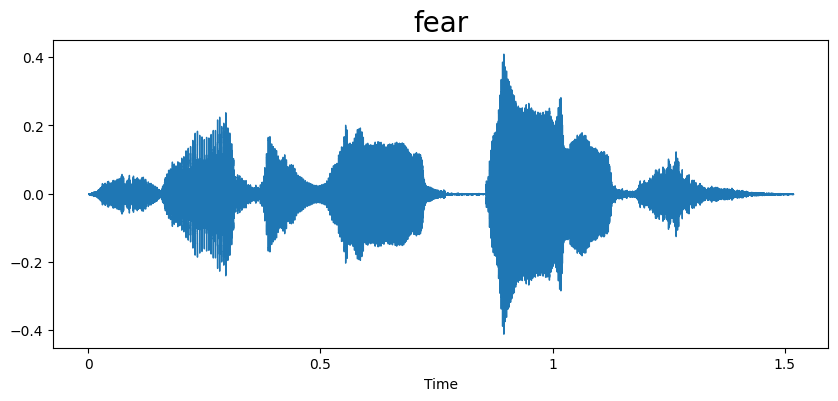

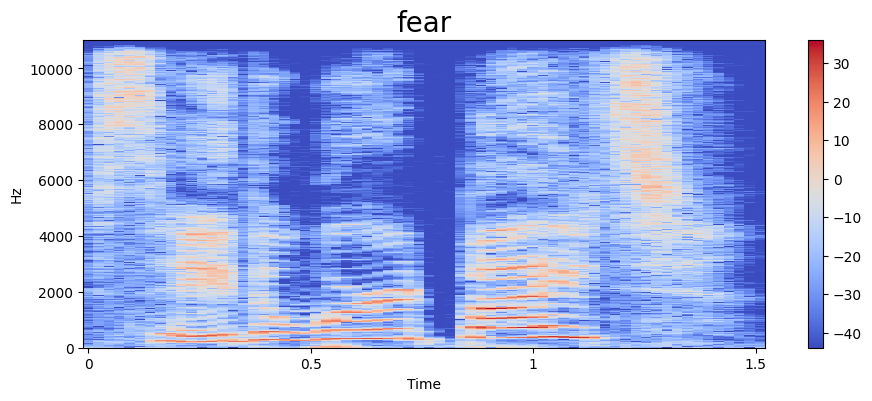

In [8]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

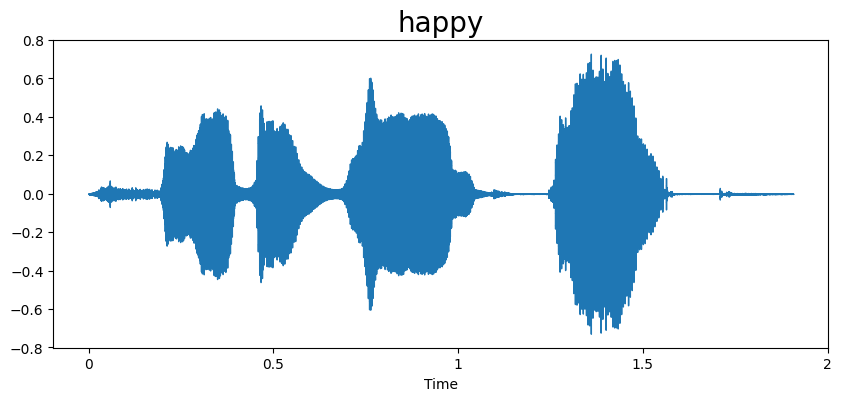

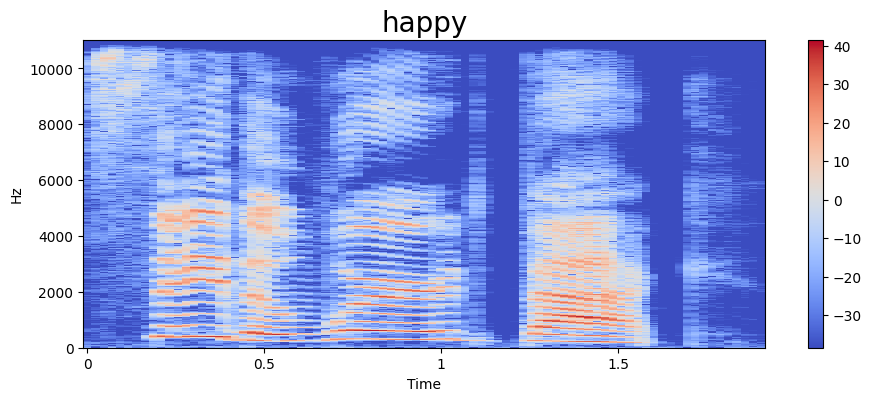

In [9]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

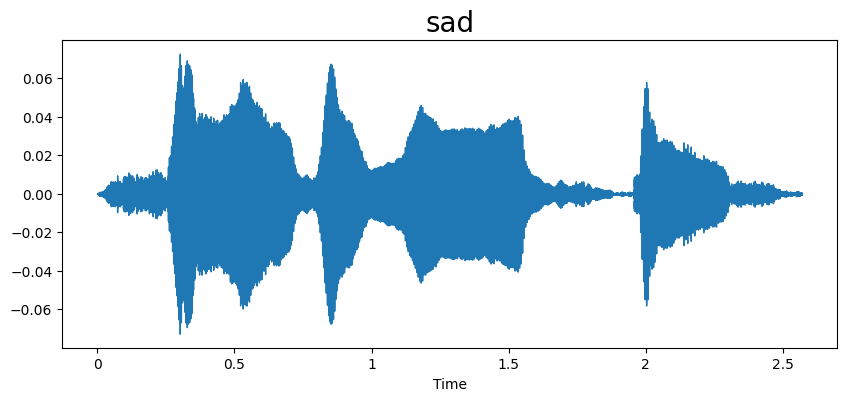

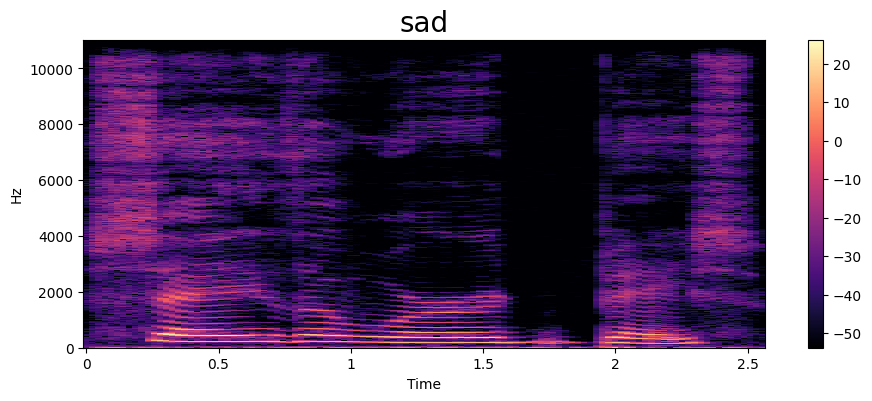

In [10]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

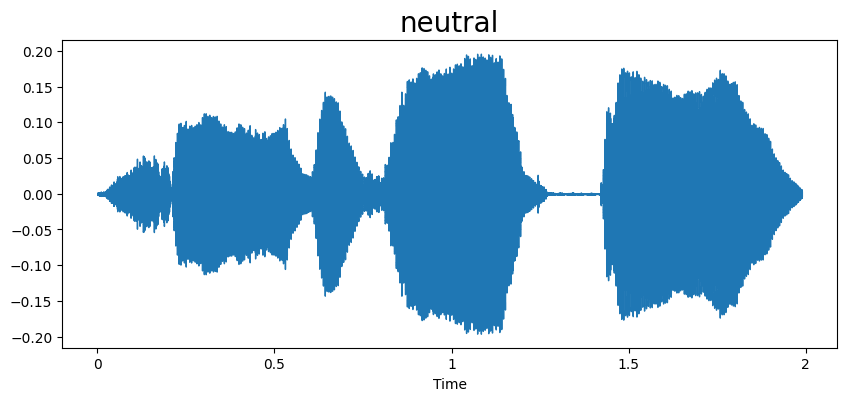

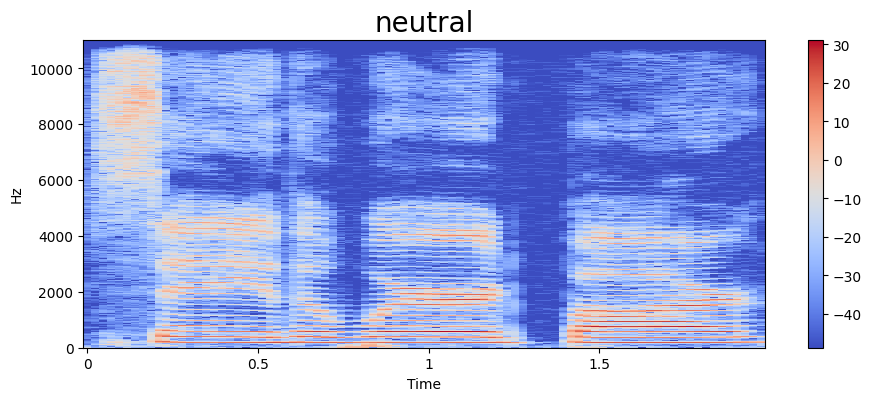

In [11]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [12]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [13]:
extract_mfcc(df['speech'][0])

array([-3.7143219e+02,  1.0730623e+02, -2.3698473e+01,  1.2954164e+01,
       -1.6478785e+00, -5.3196540e+00,  7.2556028e+00, -3.1285227e+01,
        6.1659107e+00,  9.4333057e+00, -1.8406078e+01,  1.6535067e+01,
       -1.0987551e+01,  2.5259962e+00, -2.1996713e+00, -3.7802999e+00,
       -3.6516774e+00, -1.4500014e+00, -6.4243488e+00, -8.0468750e+00,
        3.1231484e-01, -6.4815488e+00, -7.2502322e+00, -6.2221009e-01,
       -5.7932014e+00, -5.4456139e+00, -1.8509228e+00, -3.3349209e+00,
       -6.2569413e+00, -4.3501639e+00, -1.7082476e+01, -3.1561897e+00,
       -8.6936092e+00,  1.0848949e+01,  2.3514397e+01,  3.9630558e+01,
        3.8976402e+01,  3.0011408e+01,  9.1785078e+00, -1.9720953e+00],
      dtype=float32)

In [14]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [15]:
X_mfcc

0       [-371.4322, 107.30623, -23.698473, 12.954164, ...
1       [-394.82037, 52.27196, -0.23424323, 31.694353,...
2       [-493.06287, 98.67417, 20.978218, 21.97623, 3....
3       [-409.94513, 105.649796, -4.5642548, 20.286285...
4       [-393.81622, 91.65329, -18.69992, 12.519554, 4...
                              ...                        
2795    [-464.8119, 70.25582, 10.510636, -12.559635, -...
2796    [-437.882, 86.159096, -5.292689, -23.754158, -...
2797    [-431.9688, 65.27249, -0.07333638, -14.369297,...
2798    [-413.2932, 81.26914, -5.3418655, -12.67008, -...
2799    [-428.4035, 65.692116, 5.564823, -1.1533773, 2...
Name: speech, Length: 2800, dtype: object

In [16]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [17]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [18]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [19]:
y = y.toarray()

In [20]:
y.shape

(2800, 7)

In [21]:
import tensorflow as tf
# import tensorflow.keras
from tensorflow import keras
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.keras import optimizers
#from tensorflow.keras.optimizers import rmsprop_v2
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LSTM,Masking,concatenate,AveragePooling1D, BatchNormalization

In [22]:

from keras.layers import SimpleRNN
model = Sequential([
    SimpleRNN(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66048     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [23]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 5s 98ms/step - loss: 1.0977 - accuracy: 0.5866 - val_loss: 3.6093 - val_accuracy: 0.2875
Epoch 2/50
35/35 [==============================] - 2s 46ms/step - loss: 0.4738 - accuracy: 0.8281 - val_loss: 3.3107 - val_accuracy: 0.3232
Epoch 3/50
35/35 [==============================] - 2s 47ms/step - loss: 0.2716 - accuracy: 0.9085 - val_loss: 4.4334 - val_accuracy: 0.3071
Epoch 4/50
35/35 [==============================] - 2s 46ms/step - loss: 0.2312 - accuracy: 0.9246 - val_loss: 3.3978 - val_accuracy: 0.4536
Epoch 5/50
35/35 [==============================] - 2s 46ms/step - loss: 0.1648 - accuracy: 0.9504 - val_loss: 5.0438 - val_accuracy: 0.2786
Epoch 6/50
35/35 [==============================] - 2s 48ms/step - loss: 0.1253 - accuracy: 0.9643 - val_loss: 4.9672 - val_accuracy: 0.2804
Epoch 7/50
35/35 [==============================] - 2s 56ms/step - loss: 0.1508 - accuracy: 0.9531 - val_loss: 5.1350 - val_accuracy: 0.2661
Epoch 8/50
35

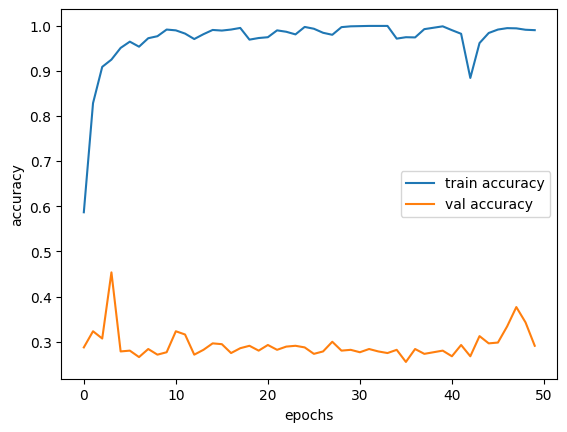

In [24]:
#Accuracy of model
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
print(X1_train.shape)
print(y1_train.shape)

(2240, 40, 1)
(2240, 7)


In [28]:
# from sklearn.model_selection import KFold
from sklearn.model_selection import KFold
FOLDS = 5
#folds = 5
kf = KFold(FOLDS)
# print(kf)
# X,y = kf.split(X1_train,y1_train)
# print(X,y)
folds = list(kf.split(X1_train,y1_train))

for i, (train, test) in enumerate(folds):
           X_train_kf =    X1_train[train]
           y_train_kf =    y1_train[train]
           X_test_kf =     X1_train[test]
           y_test_kf =     y1_train[test]
          #  print(X_train_kf,y_train_kf,X_test_kf,y_test_kf)

          #  x_traincnn1_kf = np.expand_dims(X_train_kf, axis=2)
          #  x_traincnn1_kf = X_train_kf
          #  x_testcnn1_kf = np.expand_dims(X_test_kf, axis=2)
          #  x_testcnn1_kf = X_test_kf
          #  x_traincnn1_kf.shape
          #  print(kf)
           history=model.fit(X_train_kf, y_train_kf,
                                batch_size=16,
                                epochs=30,
                                validation_data=(X_test_kf, y_test_kf))

Epoch 1/30
112/112 [==============================] - 4s 23ms/step - loss: 0.5087 - accuracy: 0.8532 - val_loss: 0.2821 - val_accuracy: 0.9196
Epoch 2/30
112/112 [==============================] - 2s 22ms/step - loss: 0.4396 - accuracy: 0.8672 - val_loss: 0.2828 - val_accuracy: 0.9174
Epoch 3/30
112/112 [==============================] - 2s 22ms/step - loss: 0.2326 - accuracy: 0.9381 - val_loss: 0.2208 - val_accuracy: 0.9219
Epoch 4/30
112/112 [==============================] - 3s 30ms/step - loss: 0.1778 - accuracy: 0.9431 - val_loss: 0.0904 - val_accuracy: 0.9688
Epoch 5/30
112/112 [==============================] - 3s 27ms/step - loss: 0.1412 - accuracy: 0.9637 - val_loss: 0.1450 - val_accuracy: 0.9554
Epoch 6/30
112/112 [==============================] - 2s 22ms/step - loss: 0.1691 - accuracy: 0.9554 - val_loss: 0.1427 - val_accuracy: 0.9509
Epoch 7/30
112/112 [==============================] - 3s 23ms/step - loss: 0.1581 - accuracy: 0.9520 - val_loss: 0.0818 - val_accuracy: 0.9777

In [29]:
print(X_train_kf.shape)
print(y_train_kf.shape)
print(X_test_kf.shape)
print(y_test_kf.shape)

(1792, 40, 1)
(1792, 7)
(448, 40, 1)
(448, 7)


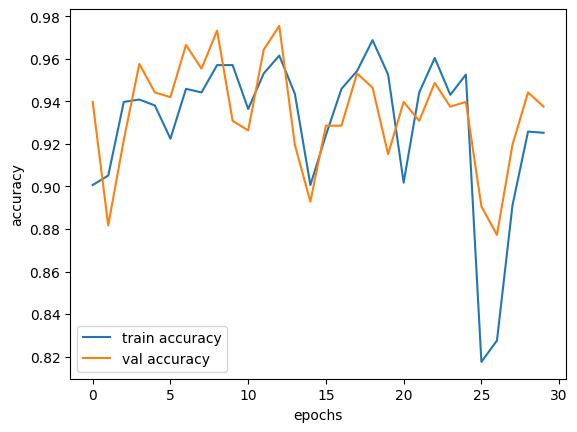

In [30]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

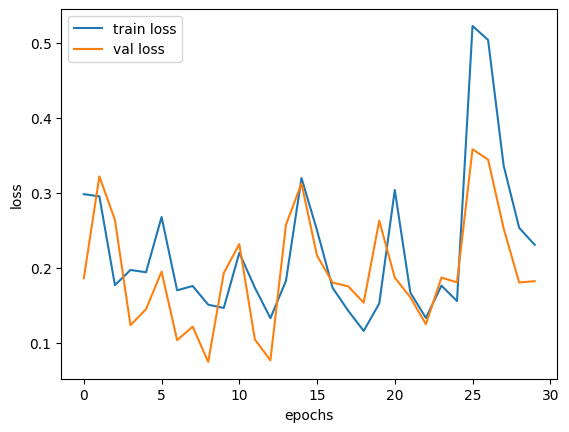

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test_kf)

class_names= np.argmax(predictions, axis=1)
new_Ytest = np.argmax(y_test_kf, axis=1)

report = classification_report(new_Ytest, class_names)
print(report)
# In[30]:
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test_kf, steps=len(X_test_kf), verbose=0)
y_true=np.argmax(new_Ytest, axis=-1)

cm = confusion_matrix(new_Ytest, class_names)
print(cm)

14/14 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.86      0.96      0.91        52
           2       0.97      0.98      0.98        65
           3       0.96      0.93      0.94        69
           4       0.98      1.00      0.99        52
           5       0.86      0.92      0.89        65
           6       1.00      0.85      0.92        74

    accuracy                           0.94       448
   macro avg       0.94      0.94      0.94       448
weighted avg       0.94      0.94      0.94       448

[[67  0  1  0  1  2  0]
 [ 1 50  0  0  0  1  0]
 [ 0  0 64  1  0  0  0]
 [ 1  0  1 64  0  3  0]
 [ 0  0  0  0 52  0  0]
 [ 1  3  0  1  0 60  0]
 [ 1  5  0  1  0  4 63]]


In [33]:
test_paths = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS_Dataset'):
    for filename in filenames:
        test_path = os.path.dirname(dirname)
        test_paths.append(os.path.join(dirname, filename))

In [34]:
# adding to dataframe
df_test = pd.DataFrame()
df_test['test_speech'] = test_paths
df_test.head()

,test_speech
0,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...
1,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...
2,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...
3,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...
4,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...


In [35]:
#extracting feature
extract_mfcc(df_test['test_speech'][0])

array([-3.7143219e+02,  1.0730623e+02, -2.3698473e+01,  1.2954164e+01,
       -1.6478785e+00, -5.3196540e+00,  7.2556028e+00, -3.1285227e+01,
        6.1659107e+00,  9.4333057e+00, -1.8406078e+01,  1.6535067e+01,
       -1.0987551e+01,  2.5259962e+00, -2.1996713e+00, -3.7802999e+00,
       -3.6516774e+00, -1.4500014e+00, -6.4243488e+00, -8.0468750e+00,
        3.1231484e-01, -6.4815488e+00, -7.2502322e+00, -6.2221009e-01,
       -5.7932014e+00, -5.4456139e+00, -1.8509228e+00, -3.3349209e+00,
       -6.2569413e+00, -4.3501639e+00, -1.7082476e+01, -3.1561897e+00,
       -8.6936092e+00,  1.0848949e+01,  2.3514397e+01,  3.9630558e+01,
        3.8976402e+01,  3.0011408e+01,  9.1785078e+00, -1.9720953e+00],
      dtype=float32)

In [36]:
X_mfcc_test = df_test['test_speech'].apply(lambda x_test: extract_mfcc(x_test))